In [22]:
import pandas as pd
import arff
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score

n_estimators = 180

In [23]:
def auc_scorer(clf, X, y, model): # Helper function to plot the ROC curve
    if model=='RF':
        fpr, tpr, _ = roc_curve(y, clf.predict_proba(X)[:,1])
    elif model=='SVM':
        fpr, tpr, _ = roc_curve(y, clf.decision_function(X))
    roc_auc = auc(fpr, tpr)

    plt.figure()    # Plot the ROC curve
    plt.plot(fpr, tpr, label='ROC curve from '+model+' model (area = %0.3f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr,roc_auc

In [24]:
data = arff.load(open('Chronic_Kidney_Disease/chronic_kidney_disease_full.arff'))
data = pd.DataFrame(data["data"], columns = list(pd.DataFrame(data["attributes"]).iloc[:,0]))
experiment_data = data[data.isna().any(axis=1)]
data = data.dropna()

In [25]:
data = data.replace(["normal", "abnormal", "yes", "no", "present", "notpresent", "good", "poor", "ckd", "notckd"],\
                   [1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

# data = data.replace(["normal", "abnormal", "yes", "no", "present", "notpresent", "good", "poor", "ckd", "notckd"],\
#                     [0, 1, 1, 0, 1, 0, 1, 0, 1, 0])
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
3,48.0,70.0,1.005,4,0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
9,53.0,90.0,1.020,2,0,0,0,1,0,70.0,...,29.0,12100.0,3.7,1,1,0,0,0,1,1
11,63.0,70.0,1.010,3,0,0,0,1,0,380.0,...,32.0,4500.0,3.8,1,1,0,0,1,0,1
14,68.0,80.0,1.010,3,2,1,0,1,1,157.0,...,16.0,11000.0,2.6,1,1,1,0,1,0,1
20,61.0,80.0,1.015,2,0,0,0,0,0,173.0,...,24.0,9200.0,3.2,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0,0,1,1,0,0,140.0,...,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,42.0,70.0,1.025,0,0,1,1,0,0,75.0,...,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,12.0,80.0,1.020,0,0,1,1,0,0,100.0,...,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,17.0,60.0,1.025,0,0,1,1,0,0,114.0,...,51.0,7200.0,5.9,0,0,0,1,0,0,0


In [26]:
data = data.astype(float)

In [27]:
raw_Y = data.pop("class")
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
3,48.0,70.0,1.005,4.0,0.0,1.0,0.0,1.0,0.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
9,53.0,90.0,1.020,2.0,0.0,0.0,0.0,1.0,0.0,70.0,...,9.5,29.0,12100.0,3.7,1.0,1.0,0.0,0.0,0.0,1.0
11,63.0,70.0,1.010,3.0,0.0,0.0,0.0,1.0,0.0,380.0,...,10.8,32.0,4500.0,3.8,1.0,1.0,0.0,0.0,1.0,0.0
14,68.0,80.0,1.010,3.0,2.0,1.0,0.0,1.0,1.0,157.0,...,5.6,16.0,11000.0,2.6,1.0,1.0,1.0,0.0,1.0,0.0
20,61.0,80.0,1.015,2.0,0.0,0.0,0.0,0.0,0.0,173.0,...,7.7,24.0,9200.0,3.2,1.0,1.0,1.0,0.0,1.0,1.0


In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(data, raw_Y, test_size = 0.05, random_state = 42)

In [29]:
classifier = RandomForestClassifier(max_depth=15, n_jobs = -1, random_state=42, verbose=True,  n_estimators = n_estimators)

In [30]:
# X_train = (X_train - X_train.mean(axis = 0)) / X_train.std(axis = 0)
X_train

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
325,58.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,14.0,50.0,6700.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0
382,48.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,75.0,...,16.8,51.0,6000.0,6.5,0.0,0.0,0.0,1.0,0.0,0.0
130,50.0,90.0,1.010,2.0,0.0,1.0,0.0,1.0,1.0,128.0,...,8.2,22.0,16300.0,2.7,0.0,0.0,0.0,0.0,1.0,1.0
263,45.0,80.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,117.0,...,16.2,45.0,8600.0,5.2,0.0,0.0,0.0,1.0,0.0,0.0
92,71.0,70.0,1.010,3.0,0.0,1.0,0.0,1.0,1.0,219.0,...,10.4,33.0,5600.0,3.6,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,33.0,80.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,100.0,...,16.9,52.0,6700.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0
341,63.0,70.0,1.025,0.0,0.0,1.0,1.0,0.0,0.0,130.0,...,13.4,41.0,7300.0,4.7,0.0,0.0,0.0,1.0,0.0,0.0
91,56.0,70.0,1.015,4.0,1.0,0.0,1.0,0.0,0.0,210.0,...,16.1,52.0,12500.0,5.6,0.0,0.0,0.0,1.0,0.0,0.0
320,57.0,60.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,105.0,...,15.7,44.0,10400.0,6.2,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
classifier.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    0.3s finished


RandomForestClassifier(max_depth=15, n_estimators=180, n_jobs=-1,
                       random_state=42, verbose=True)

In [32]:
# X_test = (X_test - X_train.mean(axis = 0)) / X_train.std(axis = 0)

In [33]:
test_1 = classifier.score(X_test, Y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.0s finished


In [34]:
experiment_data = experiment_data.replace(["normal", "abnormal", "yes", "no", "present", "notpresent", "good", "poor", "ckd", "notckd"],\
                   [1, 0, 1, 0, 1, 0, 1, 0, 1, 0])

In [35]:
Y_experiment = experiment_data.pop("class")

In [36]:
experiment_data = experiment_data.astype(float)

In [37]:
experiment_data = experiment_data.replace(pd.np.nan, experiment_data.mean())

/Users/mashnoonislam/.virtualenvs/ckd/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


In [38]:
# experiment_data = (experiment_data - X_train.mean(axis = 0)) / X_train.std(axis = 0)
experiment_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.677778,1.000000,0.0,0.0,121.000000,...,15.400000,44.000000,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0.677778,1.000000,0.0,0.0,161.358586,...,11.300000,38.000000,6000.0,4.445045,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,1.000000,1.000000,0.0,0.0,423.000000,...,9.600000,31.000000,7500.0,4.445045,0.0,1.0,0.0,0.0,0.0,1.0
4,51.0,80.0,1.010,2.0,0.0,1.000000,1.000000,0.0,0.0,106.000000,...,11.600000,35.000000,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0
5,60.0,90.0,1.015,3.0,0.0,0.677778,0.734463,0.0,0.0,74.000000,...,12.200000,39.000000,7800.0,4.400000,1.0,1.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,65.0,70.0,1.025,0.0,0.0,0.677778,0.734463,0.0,0.0,85.000000,...,16.100000,43.000000,9600.0,4.500000,0.0,0.0,0.0,1.0,0.0,0.0
363,67.0,80.0,1.025,0.0,0.0,1.000000,1.000000,0.0,0.0,99.000000,...,17.800000,44.000000,5900.0,5.200000,0.0,0.0,0.0,1.0,0.0,0.0
365,24.0,80.0,1.020,0.0,0.0,1.000000,1.000000,0.0,0.0,93.000000,...,11.561053,36.081871,10700.0,6.300000,0.0,0.0,0.0,1.0,0.0,0.0
378,71.0,60.0,1.025,0.0,0.0,1.000000,1.000000,0.0,0.0,161.358586,...,15.200000,42.000000,7700.0,5.500000,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
test_2 = classifier.score(experiment_data, Y_experiment)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.0s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.0s finished


Detailed classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

Confusion Matrix:
[[7 0]
 [0 1]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.0s finished


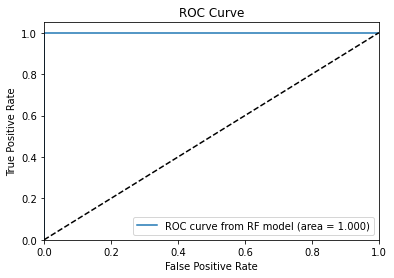

(array([0.        , 0.        , 0.28571429, 1.        ]),
 array([0., 1., 1., 1.]),
 1.0)

In [40]:
print("Detailed classification report:")
y_true, lr_pred = Y_test, classifier.predict(X_test)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(Y_test, lr_pred)
print('Confusion Matrix:')
print(confusion)

auc_scorer(classifier, X_test, Y_test, 'RF')

Detailed classification report:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        35
           1       1.00      0.94      0.97       207

    accuracy                           0.95       242
   macro avg       0.86      0.97      0.91       242
weighted avg       0.96      0.95      0.95       242

Confusion Matrix:
[[ 35   0]
 [ 13 194]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    0.0s finished


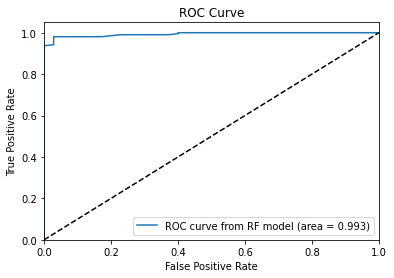

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02857143, 0.02857143, 0.02857143, 0.02857143, 0.02857143,
        0.02857143, 0.17142857, 0.22857143, 0.28571429, 0.34285714,
        0.37142857, 0.4       , 0.4       , 0.51428571, 0.6       ,
        0.65714286, 0.71428571, 1.        ]),
 array([0.        , 0.08695652, 0.10628019, 0.12077295, 0.19323671,
        0.22222222, 0.26570048, 0.29468599, 0.31400966, 0.37198068,
  

In [41]:
print("Detailed classification report:")
y_true, lr_pred = Y_experiment, classifier.predict(experiment_data)
print(classification_report(y_true, lr_pred))

confusion = confusion_matrix(Y_experiment, lr_pred)
print('Confusion Matrix:')
print(confusion)

auc_scorer(classifier, experiment_data, Y_experiment, 'RF')